In [1]:
import pickle
import os.path
import numpy as np
import pandas as pd
import umap
import plotly.graph_objs as go
from sqlalchemy import create_engine
import plotly

In [2]:
path = os.getcwd()
with open('../Pickles/word2vec_4.pkl', 'rb') as file:
    w2v_model = pickle.load(file)

In [3]:
words = set(w2v_model.wv.vocab)

In [4]:
vectors = []
vocab = []
for word in words:
    vectors.append(w2v_model.wv.__getitem__([word]))
    vocab.append(word)

In [5]:
vectors = np.asarray(vectors)
vectors = vectors.reshape(-1, 300)

In [6]:
test = umap.UMAP(n_neighbors=5, min_dist=0.0, n_components=2, random_state=42).fit_transform(vectors)

/Users/jamoth/anaconda3/envs/dsj/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/dsj/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^


/Users/jamoth/anaconda3/envs/dsj/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/dsj/lib/python3.7/site-packa

In [7]:
w2v = pd.DataFrame({'x': [x for x in test[:,0]],
                    'y': [y for y in test[:,1]],
                    'word': vocab})

In [46]:
def close_words(df, word, neighbors, model):
    close_words = model.wv.most_similar([word], topn=neighbors)
    word_list = []
    for i in range(neighbors):
        word_list.append(close_words[i][0])
    subdf = df[df['word'].isin(word_list)]
    return subdf

In [119]:
closest = 200
a = close_words(w2v, 'python', closest, w2v_model)
b = close_words(w2v, 'venture', closest, w2v_model)
c = close_words(w2v, 'business', closest, w2v_model)
d = close_words(w2v, 'manage', closest, w2v_model)
e = close_words(w2v, 'learn', closest, w2v_model)

In [120]:
trace0 = dict(type='scatter', x=w2v.x, y=w2v.y, mode = 'markers', marker = dict(color='lightgrey'), text=w2v['word'], name='unlabeled')
trace1 = dict(type='scatter', x=a.x, y=a.y, mode = 'markers', marker = dict(color='red'), text=a['word'], name = 'python')
trace2 = dict(type='scatter', x=b.x, y=b.y, mode = 'markers', marker = dict(color='green'), text=b['word'], name = 'venture')
trace3 = dict(type='scatter', x=c.x, y=c.y, mode = 'markers', marker = dict(color='blue'), text=c['word'], name = 'business')
trace4 = dict(type='scatter', x=d.x, y=d.y, mode = 'markers', marker = dict(color='purple'), text=d['word'], name = 'manage')
trace5 = dict(type='scatter', x=e.x, y=e.y, mode = 'markers', marker = dict(color='black'), text=e['word'], name = 'learn')

layout = dict(title='UMAP visualization for: Word2Vector', xaxis=dict(title=''),yaxis=dict(title=''), width=900, height=900)

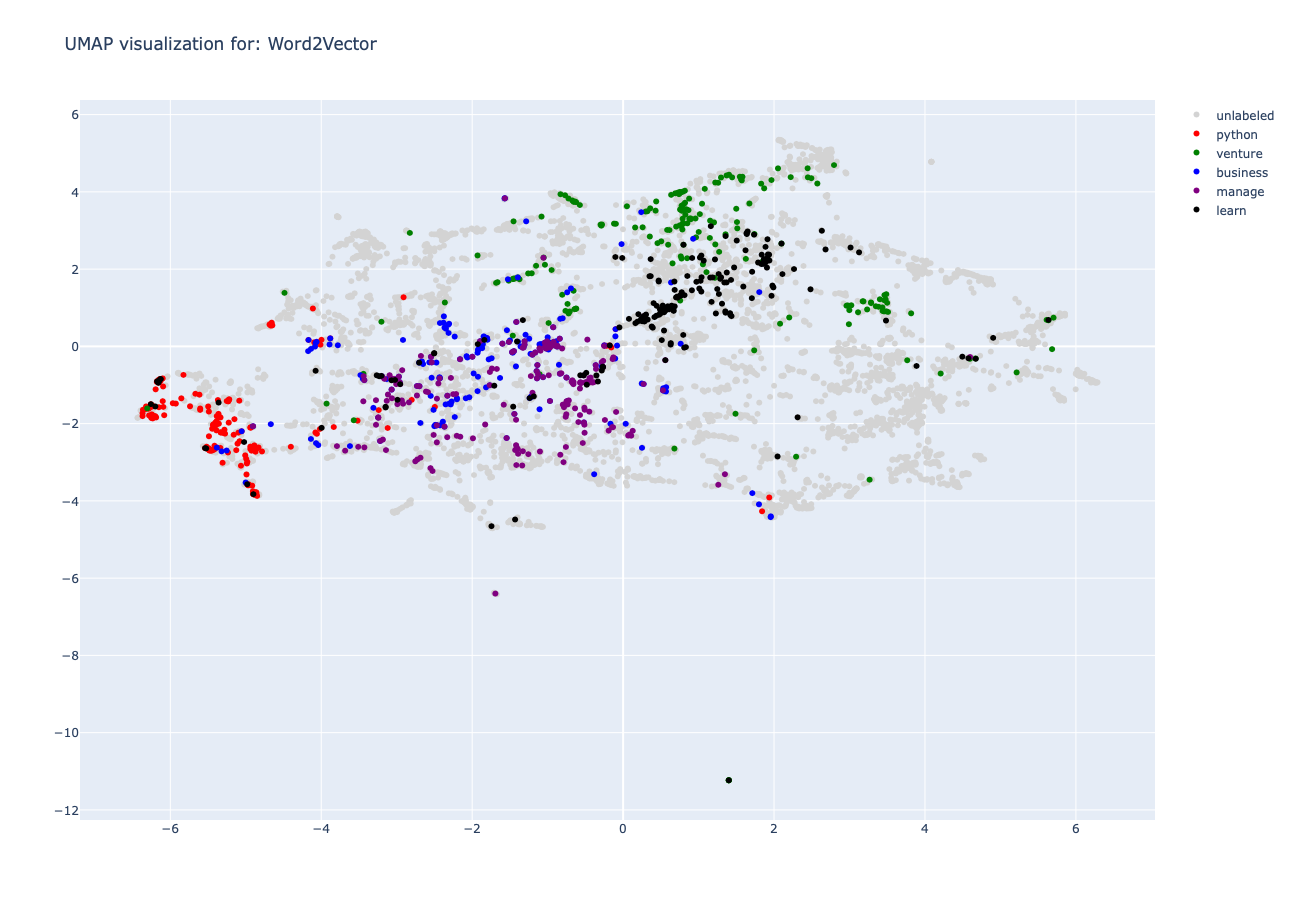

In [121]:
fig = go.Figure(data=[trace0, trace1, trace2, trace3, trace4, trace5], layout=layout)
fig.show()

In [122]:
fig.write_html(file='umap_word.html', include_plotlyjs=False, full_html=False)
fig.write_html(file='umap_word_alone.html', include_plotlyjs='cdn')